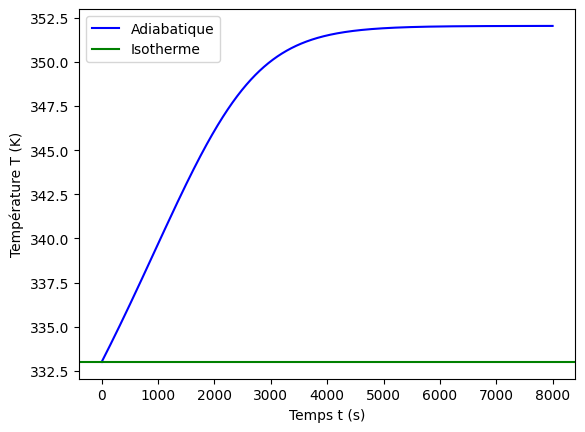

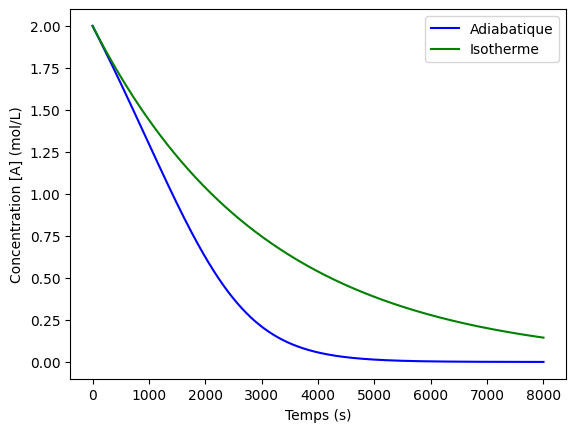

In [1]:
#Importation des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#Données
k0 = 2E8 #facteur pré-exponentiel en s-1
Ea = 75e3 #énergie d'activation en J/mol
R = 8.3 #constante des gaz parfaits en J/K/mol
DrH = -40e3 #enthalpie standard de réaction en J/mol
V = .100 #volume du milieu réactionnel en L
C0 = 2 #concentration initiale en A en mol/L
ceau = 4.2e3 #capacité thermique massique de l'eau en J/K/kg
rho = 1 #masse volumique de l'eau en kg/L
T0 = 60+273 #température initiale du mélange réactionnel en K
Jm = - DrH / (rho * ceau * V)
#Intégration
def f(ksi,t) : #Renvoie la dérivée dksi/dt
 return k0 * np.exp(-Ea/R/(T0+Jm*ksi)) * (C0*V - ksi)
t = np.linspace(0, 8000,2000) #Calcul des températures
ksi = odeint(f,[0],t) #Commande d’intégration
T = T0 +Jm*ksi #Calcul des valeurs de température T
C = C0 - ksi/V #Calcul des valeurs de concentration [A]
#Création de graphiques
plt.figure(1)
plt.plot(t,T,'b-', label='Adiabatique')
plt.axhline(T0,ls='-', color='g', label='Isotherme')
plt.xlabel('Temps t (s)')
plt.ylabel('Température T (K)')
plt.legend()
plt.figure(2)
plt.plot(t,C,'b-', label='Adiabatique')
plt.plot(t,C0*np.exp(-k0*np.exp(-Ea/R/T0)*t),'g-', label='Isotherme')
plt.xlabel('Temps (s)')
plt.ylabel('Concentration [A] (mol/L)')
plt.legend()
plt.show()

# Modélisation Forte : Évolution Adiabatique
## Application du Premier Principe de la Thermodynamique
### Hypothèses Clés
Conditions de modélisation : 
- **Isobare** ($P = \text{cte}$)
- **Adiabatique** ($\delta Q = 0$)
- **Sans travail utile** ($\delta W_u = 0$)

Le premier principe s'écrit alors :
$$
dH = \delta Q + \delta W_u = 0
$$

L’enthalpie étant une fonction d’état, sa variation ne dépend pas du chemin suivi. Celle-ci peut être calculée sur un chemin fictif au cours duquel les variations de température et d’avancement sont décorrélées. Le chemin fictif proposé consiste d’abord en une transformation chimique isotherme ($\xi$ varie, $T$ constante), puis en une variation de température à composition fixée ($\xi$ varie, $T$ constante).

$$ dH = \Delta_{\mathrm{r}}H^\circ \, d\xi + C_p\,dT = 0 $$

$$ \frac{dT}{d\xi} = - \frac{\Delta_{\mathrm{r}}H^\circ}{C_p}$$ 

La valeur de l’enthalpie standard de réaction est supposée constante tout au long de la transformation. La capacité
thermique du système (grandeur extensive) dépend de la capacité thermique du réacteur et de celles des différentes
espèces chimiques constituant le milieu. L’eau étant le solvant, et à ce titre, largement majoritaire, on considérera que
la capacité thermique du système s’identifie à sa contribution.

$$ C_p = C_{p,reacteur} + C_{p,\mathrm{H_2 0}} + C_{p,A} \approx C_{p,\mathrm{H_2 0}} = m_{\mathrm{H_2 0}} \cdot c_{\mathrm{H_2 0}} $$

Le lien entre variation de température et variation d’avancement est déterminé par intégration, le terme $J_m$
représentant la variation maximale de température par mole d’avancement, en condition adiabatique. Ainsi, plus la
capacité thermique du système est grande, plus les variations de température sont faibles.

$$ \frac{dT}{d\xi} = - \frac{\Delta_{\mathrm{r}}H^\circ}{m_{\mathrm{H_2 0}} \cdot c_{\mathrm{H_2 0}}} \Rightarrow T(\xi) = T_0 - \frac{\Delta_{\mathrm{r}}H^\circ}{m_{\mathrm{H_2 0}} \cdot c_{\mathrm{H_2 0}}} \xi \Rightarrow \boxed{T(\xi) = T_O + J_m\cdot \xi}$$


##  APPLICATION DU PREMIER PRINCIPE INDUSTRIEL
Le premier principe industriel a été présenté dans le cours de physique. Il s’écrit en régime stationnaire :
$$ \mathcal{D}_m \;\left[ \left( h + \frac{1}{2}c^2 + gz \right)\right]^s_e = \mathcal{P}_t + \mathcal{P}_u$$

Dans le cas d’un réacteur chimique, les termes de variation d’énergie cinétique et d’énergie potentielle sont
généralement négligeables devant les variations d’enthalpie (le dénivelé entre l’entrée et la sortie reste faible, les
sections d’entrée et de sortie ainsi que la masse volumique du mélange varient peu). D’autre part, le travail utile dû au
système d’agitation est négligeable.

$$ \mathcal{D}_m \Delta_{e\rightarrow s}h = \mathcal{P}_t $$ 

## Contribution physique et chimique aux variations d'enthalpie

La variation du flux d’enthalpie trouve deux origines : 

- Une **contribution physique** liée à une variation de température entre l’entrée et la sortie du réacteur (on
supposera que la capacité thermique massique moyenne reste constante pour simplifier le problème) :

$$ \mathcal{D}_m (\Delta_{e\rightarrow s}h)_{phys} =  \mathcal{D}_m c (T^s - T^e) \Rightarrow \mathcal{D}_m (\Delta_{e\rightarrow s}h)_{phys} \approx \mathcal{D}_v \times \rho c (T^s-T^e)$$ 

- Une **contribution chimique** liée à la modification de composition. Le taux de conversion passe de 0 à 𝑋
entre l’entrée et la sortie du réacteur : le flux molaire en $A$ passe de $F^e_A$ à $F^e_A(1 − 𝑋)$ soit une variation de $F^e_A \;X$. D’après le tableau de flux molaire, le terme $F^e_A \;X$ est assimilable à $\dot{\xi}$. La variation d’origine chimique du
flux d’enthalpie peut être exprimée en utilisant notamment la relation $F^e_A = C^e_A \mathcal{D}_v$:

$$ \mathcal{D}_m (\Delta_{e\rightarrow s}h)_{chim} = \mathcal{D}_v \; \Delta_{\mathrm{r}}H^\circ \cdot  C^e_A\;X $$

Dans le cas où le réacteur est calorifugé, les transferts thermiques avec le milieu extérieur sont nuls : $\mathcal{P}_t = 0$.
La température de sortie est ainsi directement liée au taux de conversion $X$ :

$$ \rho c (T^s - T^e) + \Delta_{\mathrm{r}}H^\circ \cdot  C^e_A\;X = 0 $$

La température en sortie du réacteur a une dépendance affine vis-à-vis du taux de conversion. Le terme 𝐽 représente
la variation maximale de température dans le réacteur.

$$ \boxed{T^s = T^e + J \cdot X} \quad \text{avec} \quad J = - \frac{\Delta_{\mathrm{r}}H^\circ \cdot  C^e_A}{\rho c} $$


## Point de fonctionnement du RPAC 

Une fois le bilan d’énergie effectué, il peut être couplé au bilan de matière tel que réalisé au chapitre précédent. Dans
le cas d’une loi cinétique d’ordre 1, il a été montré que le taux de conversion s’exprime en fonction du produit $k \tau$. La
dépendance de ce terme vis-à-vis de la température4 est rendu explicite par l’application de la loi d’Arrhenius.

$$ X(T) = \frac{k \tau}{1 + k \tau} $$

Nous disposons à ce stade de deux lois reliant la température en sortie du réacteur et le taux de conversion.

**Bilan d'énergie**
$$ X = \frac{T^s - T^e}{J} $$

**Bilan de matière**
$$ X = \frac{k_0 \tau \exp\left(- \frac{E_a}{RT^s} \right)}{1 + k_0 \tau \exp\left(- \frac{E_a}{RT^s} \right)} $$
Le point de fonctionnement du RPAC doit par conséquent vérifier ces deux lois. Pour le déterminer graphiquement, il
suffit de superposer les courbes correspondant à ces deux lois. 



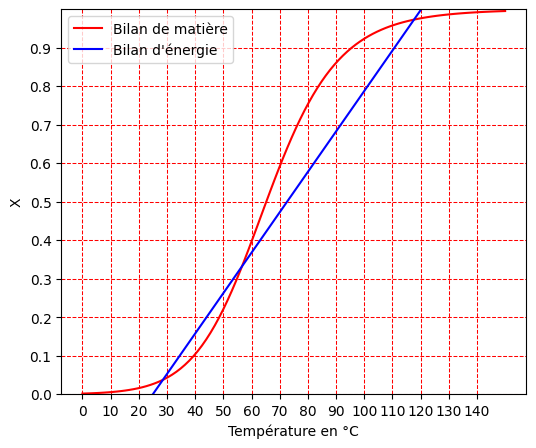

Température de fonctionnement : 29.0 °C et Taux de conversion : 0.04
Température de fonctionnement : 57.0 °C et Taux de conversion : 0.33
Température de fonctionnement : 118.0 °C et Taux de conversion : 0.97


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import bisect

# Données numériques du problème
k0 = 2E8  # facteur pré-exponentiel en s-1
Ea = 75e3  # énergie d'activation en J/mol
R = 8.3  # constante des gaz parfaits en J/K/mol
DrH = -200e3  # enthalpie standard de réaction en J/mol
C0 = 2  # concentration initiale en A en mol/L
ceau = 4.2e3  # capacité thermique massique de l'eau en J/K/kg
rho = 1  # masse volumique de l'eau en kg/L
T0 = 25 + 273  # température initiale du mélange réactionnel en K
tau = 2000
J = -DrH * C0 / (rho * ceau)

# Définition des fonctions
def k(T):  # Calcule constante de vitesse à une température donnée
    return k0 * np.exp(-Ea / (R * (T + 273)))

def X_bm(T):  # Calcule taux de conversion en RPAC (ordre 1) par bilan de matière
    return k(T) * tau / (1 + k(T) * tau)

def X_be(T):  # Calcule taux de conversion en RPAC par bilan d'énergie
    return (T + 273 - T0) / J

# Tracé du graphique
T = np.linspace(0, 150, 100)
plt.figure(figsize=(6, 5), dpi=100)
plt.plot(T, X_bm(T), 'r-', label="Bilan de matière")
plt.plot(T, X_be(T), 'b-', label="Bilan d'énergie")
plt.xlabel(r'Température en °C')
plt.ylabel('X')
plt.ylim(0, 1)
plt.legend()
plt.yticks(np.arange(0, 1, .1))
plt.xticks(np.arange(0, 150, 10))
plt.grid(color='r', linestyle='--', linewidth=0.75)
plt.show()

# Recherche des points de fonctionnement
def difference(T):
    return X_bm(T) - X_be(T)

# Fonction pour trouver tous les zéros de la fonction difference
def find_all_zeros(f, a, b, step=1):
    zeros = []
    x = a
    while x < b:
        if f(x) * f(x + step) < 0:  # Changement de signe détecté
            zero = bisect(f, x, x + step)
            zeros.append(zero)
        x += step
    return zeros

# Trouver tous les zéros de la fonction difference
zeros = find_all_zeros(difference, 0, 150)

# Afficher les résultats
for zero in zeros:
    X_fonct = X_be(zero)
    print(f'Température de fonctionnement : {round(zero, 0)} °C et Taux de conversion : {round(X_fonct, 2)}')

## Stabilité et instabilité des points de fonctionnement 
La stabilité d’un point de fonctionnement peut être évaluée en considérant une perturbation consistant par exemple à
augmenter la température à partir du point de fonctionnement.
Considérons le cas d’une transformation exothermique. En augmentant la température du système, la vitesse de la
transformation chimique augmente : le taux de conversion s’élève et un surplus d’énergie est libéré. Le système
revient au point de fonctionnement si le milieu a la capacité d’absorber le surplus d’énergie libérée en limitant
l’augmentation de température.
Cela revient à comparer les taux de variation de la température imposés par la cinétique et par la thermodynamique,
obtenus par le bilan de matière et le bilan d’énergie. Le point de fonctionnement est stable si :

$$ \left( \frac{dT}{dX} \right)_{\text{thermo (bilan energie)}} < \left( \frac{dT}{dX} \right)_{\text{cinetique (bilan matiere)}} \Rightarrow J < \left( \frac{dT}{dX} \right)_{\text{cinetique (bilan matiere)}} $$

$$ \boxed{\left( \frac{dX}{dT} \right)_{\text{cinetique (bilan matiere)}} > \frac{1}{J}}  $$

Le numérique facilite l’opération de dérivation de la fonction
Par conséquent, un système présentant 3 points de fonctionnement ne peut rester sur le point de fonctionnement
intermédiaire $P_2$. Il adopte soit le point de fonctionnement $P_1$
, soit le point de fonctionnement $P_3$ en fonction des
conditions initiales.

In [3]:
#%% Complément : Tracé de la dérivée et critère de stabilité

# Calcul de la dérivée de X_bm par rapport à T
def dX_bm_dT(T):
    k_val = k(T)
    dk_dT = k_val * (Ea / (R * (T + 273)**2))  # Dérivée de k(T) par rapport à T
    numerator = tau * dk_dT
    denominator = (1 + k_val * tau)**2
    return numerator / denominator

# Tracé de la dérivée
T_derivative = np.linspace(0, 150, 100)
dX_bm_values = dX_bm_dT(T_derivative)



# Calcul de 1/J
J_value = - DrH * C0 / (rho * ceau)
inv_J = 1 / J_value

# Vérification du critère pour chaque point de fonctionnement
for zero in zeros:
    dX_dT = dX_bm_dT(zero)
    if dX_dT < inv_J:
        stability = "Stable"
    else:
        stability = "Instable"
    print(f'Point à T = {round(zero, 1)} °C : {stability} (dX_bm/dT = {dX_dT:.3f}, 1/J = {inv_J:.3f})')

Point à T = 28.6 °C : Stable (dX_bm/dT = 0.004, 1/J = 0.010)
Point à T = 56.6 °C : Instable (dX_bm/dT = 0.018, 1/J = 0.010)
Point à T = 117.7 °C : Stable (dX_bm/dT = 0.002, 1/J = 0.010)


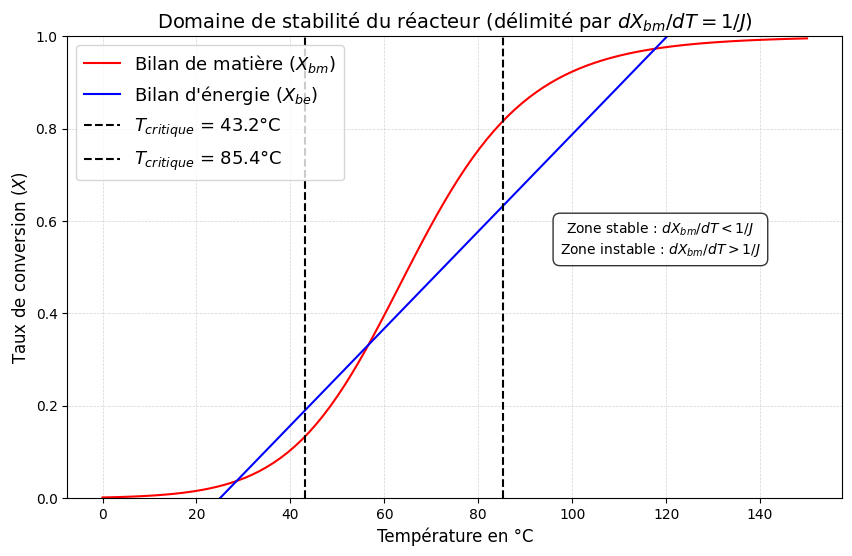

In [4]:
plt.figure(figsize=(10, 6), dpi=100)

# Tracé des courbes de bilan de matière et d'énergie
plt.plot(T, X_bm(T), 'r-', label="Bilan de matière ($X_{bm}$)")
plt.plot(T, X_be(T), 'b-', label="Bilan d'énergie ($X_{be}$)")

# Calcul des points où dX_bm/dT = 1/J (limite de stabilité)
def stability_condition(T):
    return dX_bm_dT(T) - (1 / J)

# Recherche des températures critiques où dX_bm/dT = 1/J
from scipy.optimize import fsolve
T_critique = fsolve(stability_condition, x0=[50, 100])  # Valeurs initiales estimées

# Affichage des asymptotes verticales pour les températures critiques
for Tc in T_critique:
    plt.axvline(x=Tc, color='k', linestyle='--', linewidth=1.5, 
                label=f'$T_{{critique}}$ = {Tc:.1f}°C')

# Mise en forme du graphique
plt.xlabel(r'Température en °C', fontsize=12)
plt.ylabel('Taux de conversion ($X$)', fontsize=12)
plt.title("Domaine de stabilité du réacteur (délimité par $dX_{bm}/dT = 1/J$)", fontsize=14)
plt.ylim(0, 1)
plt.legend(loc='upper left', fontsize=13)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

# Annotation du critère de stabilité
plt.annotate(
    'Zone stable : $dX_{bm}/dT < 1/J$\nZone instable : $dX_{bm}/dT > 1/J$',
    xy=(0.5, 0.5), xytext=(400, 20),
    textcoords='offset points', ha='center', va='center',
    bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
    fontsize=10
)

plt.show()

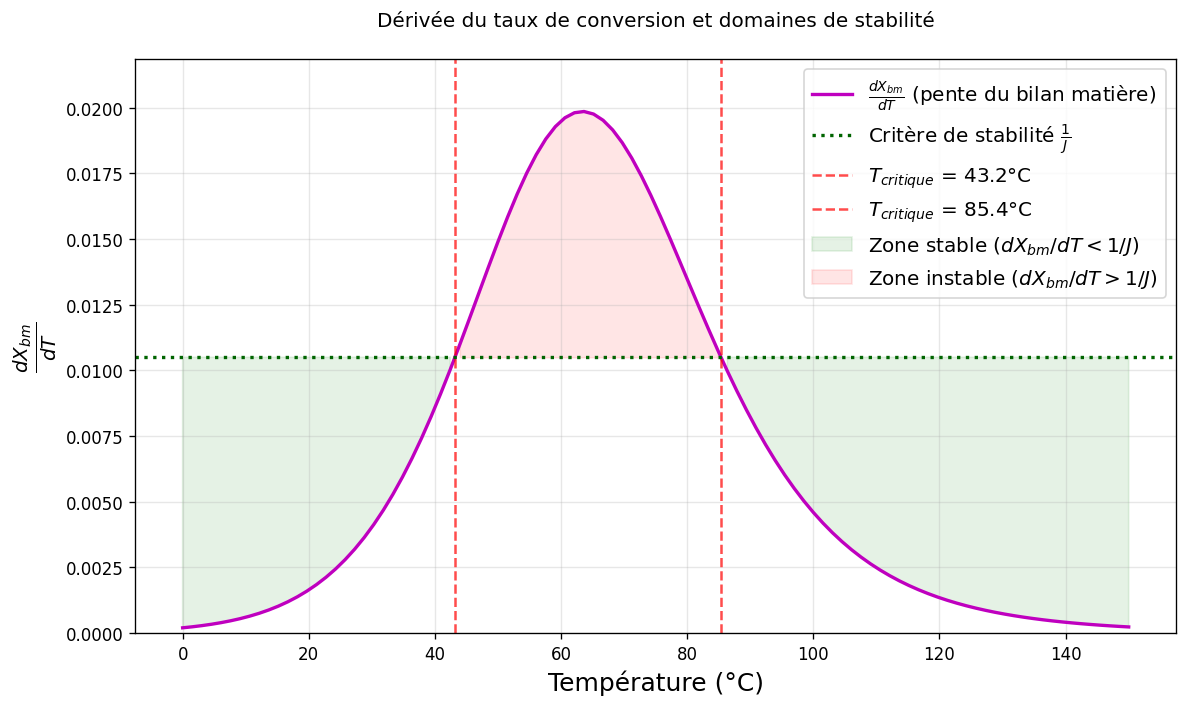

In [5]:
#%% Superposition dérivée + asymptotes de stabilité
plt.figure(figsize=(10, 6), dpi=120)

# 1. Tracé de la dérivée dX_bm/dT
dX_values = dX_bm_dT(T_derivative)
plt.plot(T_derivative, dX_values, 'm-', lw=2, 
         label=r"$\frac{dX_{bm}}{dT}$ (pente du bilan matière)")

# 2. Ligne horizontale pour 1/J (critère de stabilité)
inv_J = 1 / J
plt.axhline(y=inv_J, color='darkgreen', linestyle=':', 
            linewidth=2, label=r"Critère de stabilité $\frac{1}{J}$")

# 3. Asymptotes verticales aux points critiques (dX_bm/dT = 1/J)
T_critique = fsolve(stability_condition, x0=[30, 80])  # Ajuster selon besoin
for Tc in T_critique:
    plt.axvline(x=Tc, color='red', linestyle='--', alpha=0.7,
                label=f'$T_{{critique}}$ = {Tc:.1f}°C')

# 4. Mise en forme
plt.xlabel('Température (°C)', fontsize=15)
plt.ylabel(r"$\frac{dX_{bm}}{dT}$", fontsize=17)
plt.title("Dérivée du taux de conversion et domaines de stabilité", pad=20)
plt.ylim(0, max(dX_values)*1.1)  # Marge pour la clarté
plt.grid(alpha=0.3)

# 5. Annotations
plt.fill_between(T_derivative, dX_values, inv_J, 
                 where=(dX_values < inv_J), color='green', alpha=0.1,
                 label='Zone stable ($dX_{bm}/dT < 1/J$)')
plt.fill_between(T_derivative, dX_values, inv_J, 
                 where=(dX_values > inv_J), color='red', alpha=0.1,
                 label='Zone instable ($dX_{bm}/dT > 1/J$)')

plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()